<a href="https://colab.research.google.com/github/rizkanugrha/Data-Mining/blob/main/clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mengimport Library**


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve

### **Membaca Dataset dan Melakukan Preprocessing**

In [4]:
df = pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
df.rename(columns={'height(cm)':'height', 'weight(kg)':'weight','waist(cm)':'waist',
                        'eyesight(left)':'eyesight_left', 'eyesight(right)':'eyesight_right',
                        'hearing(left)':'hearing_left', 'hearing(right)':'hearing_right',
                        'fasting blood sugar':'fasting_blood_sugar',  'Cholesterol':'cholesterol',
                        'HDL':'hdl','LDL':'ldl','Urine protein':'urine_protein',
                        'serum creatinine':'serum_creatinine', 'AST':'ast','ALT':'alt',
                        'Gtp':'gtp', 'dental caries' : 'dental_caries'}, inplace=True)

In [7]:
df['gender'] = df['gender'].str.replace('F','0')
df['gender'] = df['gender'].str.replace('M','1')
df['gender'] = pd.to_numeric(df['gender'])

df['tartar'] = df['tartar'].str.replace('N','0')
df['tartar'] = df['tartar'].str.replace('Y','1')
df['tartar'] = pd.to_numeric(df['tartar'])

df['oral'] = df['oral'].str.replace('N','0')
df['oral'] = df['oral'].str.replace('Y','1')
df['oral'] = pd.to_numeric(df['oral'])

In [8]:
df.drop(columns=["ID"], inplace=True)

In [9]:
features = ['gender','age','height','weight','waist','eyesight_left','eyesight_right','hearing_left','hearing_right','systolic','relaxation','fasting_blood_sugar','cholesterol','triglyceride','hdl','ldl','hemoglobin','urine_protein','serum_creatinine','ast','alt','gtp','oral','dental_caries','tartar']
x = df[features]
y = df['smoking']

### **Membagi Dataset**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [11]:
print("Jumlah data pada x_train:", x_train.shape[0])
print("Jumlah data pada x_test:", x_test.shape[0])
print("Jumlah data pada y_train:", y_train.shape[0])
print("Jumlah data pada y_test:", y_test.shape[0])

Jumlah data pada x_train: 44553
Jumlah data pada x_test: 11139
Jumlah data pada y_train: 44553
Jumlah data pada y_test: 11139


### **Metode/Model**

In [12]:
# KKN clasifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_pred)
F1_knn= f1_score(y_test,y_pred)
recall_knn = recall_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
print("Score the X-train with Y-train is : ", knn.score(x_train,y_train))
print("Score the X-test with Y-test  is : ", knn.score(x_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  0.787376832087626
Score the X-test with Y-test  is :  0.7167609300655355
Accuracy Score : 71.67609300655356


In [13]:
knn_report=classification_report(y_pred,y_test)
print(knn_report)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7347
           1       0.58      0.62      0.60      3792

    accuracy                           0.72     11139
   macro avg       0.69      0.69      0.69     11139
weighted avg       0.72      0.72      0.72     11139



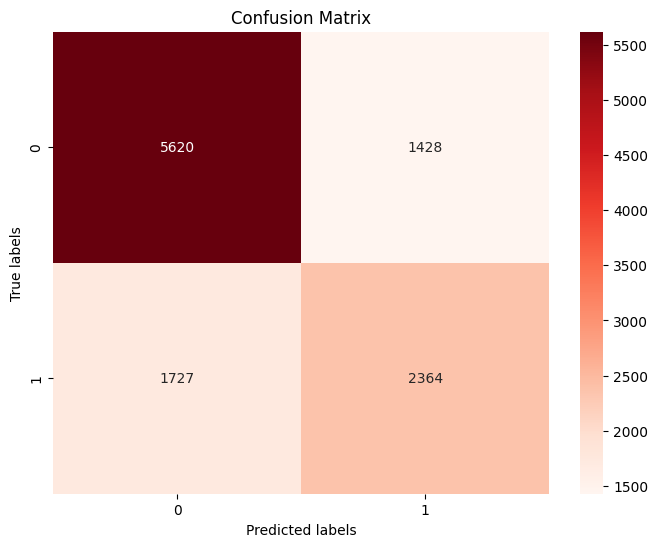

In [14]:
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

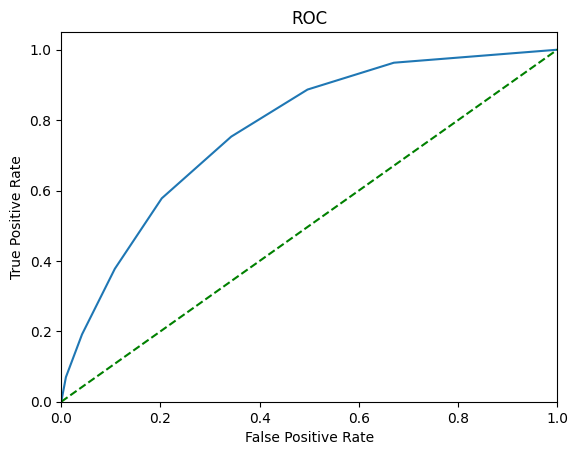

In [15]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()